This is a classification based on customer past experience they'll purchase or not. 
- This is a binary classification problem 
- Here I can use multiple model like Decision tree, Random Forest, SVM, KNN
- In this notebook I have used KNN
- We can improve our performace using Ensamble techinque
- 

In [1]:
import pandas as pd 
import numpy as np 

/Users/sanjaymahto/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [43]:
df = pd.read_csv('purchase_history.csv')

In [7]:
df.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0


In [8]:
df.count()

Customer ID    1000
Gender         1000
Age            1000
Salary         1000
Product ID     1000
Price          1000
Purchased      1000
dtype: int64

# Description about dataset
`Customer ID` => Here we don't have any missing value and this is not a relevant column for our model 

`Gender` => Data about Male and Female. we don't have any missing value 

`Age` => Age, we don't have any missing values 

`Salary` => salary of the customer No missing values 

`Price` => price of the product 

`Purchased` => This is our target column based on previous column I have predict customer will purchase or not. 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1000 non-null   int64 
 1   Gender       1000 non-null   object
 2   Age          1000 non-null   int64 
 3   Salary       1000 non-null   int64 
 4   Product ID   1000 non-null   object
 5   Price        1000 non-null   int64 
 6   Purchased    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


- Gender and Product ID are Object data type 
- Except these two column all the column are Interger data tupe 


In [10]:
df.describe()

,Customer ID,Age,Salary,Price,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.989000,58667.000000,4435.500000,0.414000
std,288.819436,13.738837,23615.372044,1847.973148,0.492795
min,1.000000,18.000000,20000.000000,2000.000000,0.000000
25%,250.750000,29.000000,38000.000000,3500.000000,0.000000
50%,500.500000,40.000000,59000.000000,5000.000000,0.000000
75%,750.250000,53.000000,80000.000000,7000.000000,1.000000
max,1000.000000,64.000000,100000.000000,7000.000000,1.000000


# EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

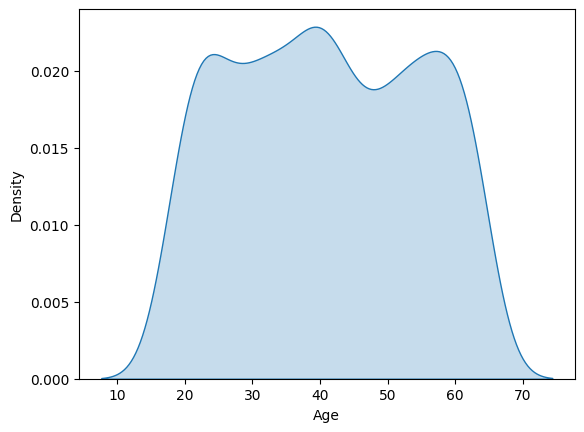

In [15]:
sns.kdeplot(df['Age'], shade=True)

<Axes: xlabel='Salary', ylabel='Density'>

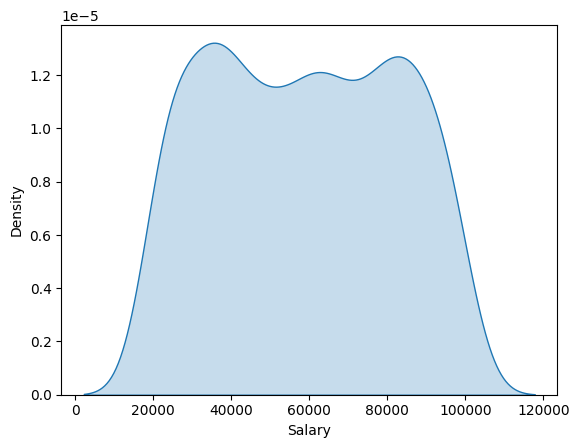

In [16]:
sns.kdeplot(df['Salary'], shade=True)

<Axes: xlabel='Gender'>

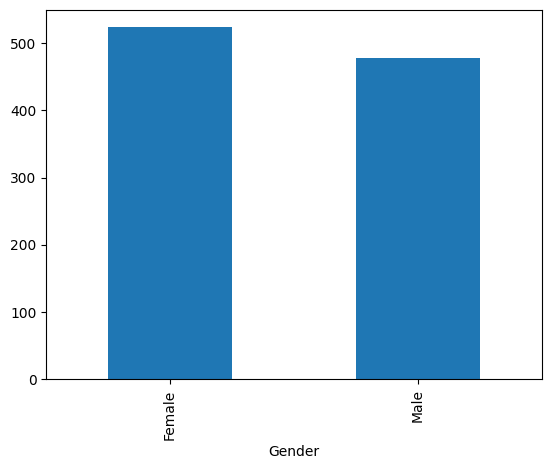

In [19]:
df['Gender'].value_counts().plot(kind='bar')

In [24]:
df.head()

,Customer ID,Gender,Age,Salary,Product ID,Price,Purchased
0,1,Female,49,61000,P01,2000,1
1,2,Male,36,30000,P02,2000,1
2,3,Female,26,81000,P02,3500,1
3,4,Female,32,74000,P01,7000,0
4,5,Female,42,56000,P01,5000,0


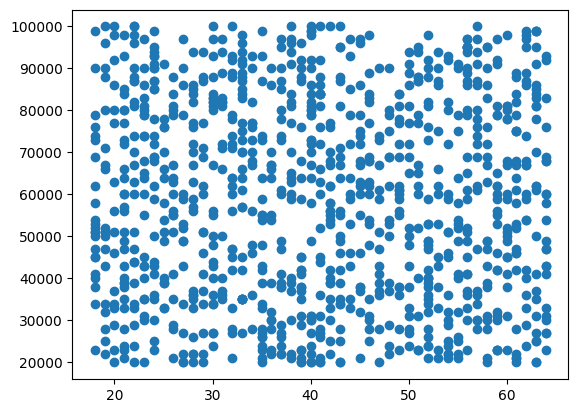

In [20]:
plt.scatter(df['Age'], df['Salary'])

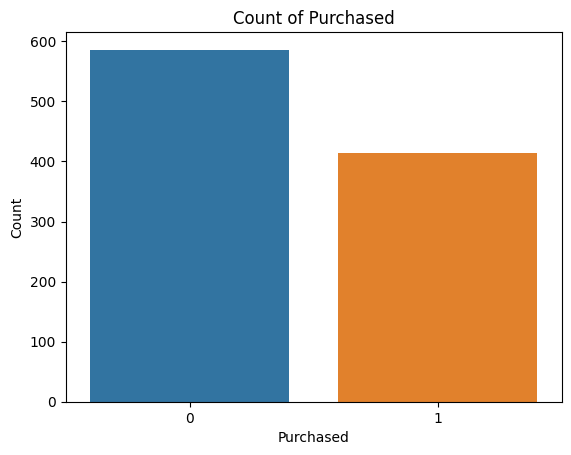

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'purchased' column
sns.countplot(x='Purchased', data=df)
plt.title('Count of Purchased')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()


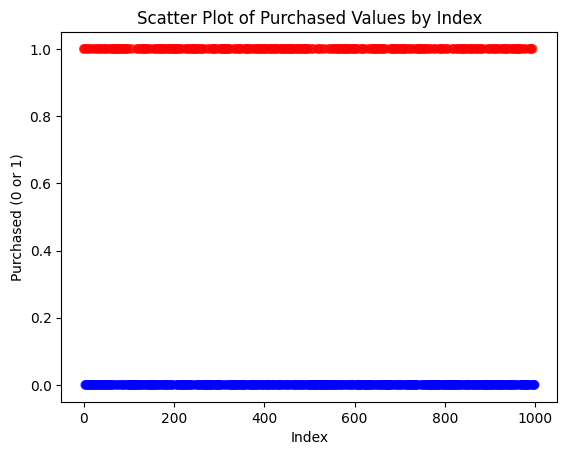

In [34]:
plt.scatter(df.index, df['Purchased'], c=df['Purchased'], cmap='bwr', alpha=0.5)
plt.title('Scatter Plot of Purchased Values by Index')
plt.xlabel('Index')
plt.ylabel('Purchased (0 or 1)')
plt.show()


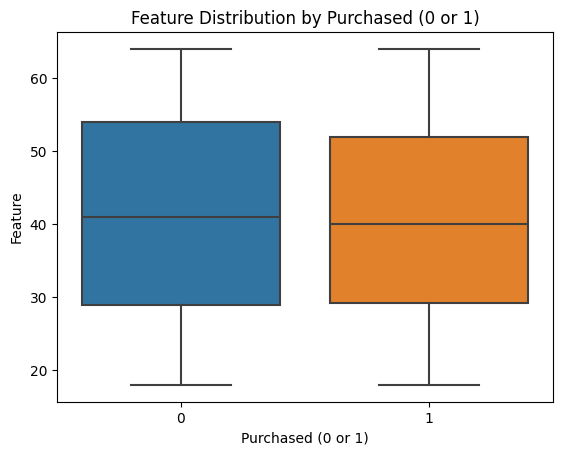

In [35]:
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Feature Distribution by Purchased (0 or 1)')
plt.xlabel('Purchased (0 or 1)')
plt.ylabel('Feature')
plt.show()


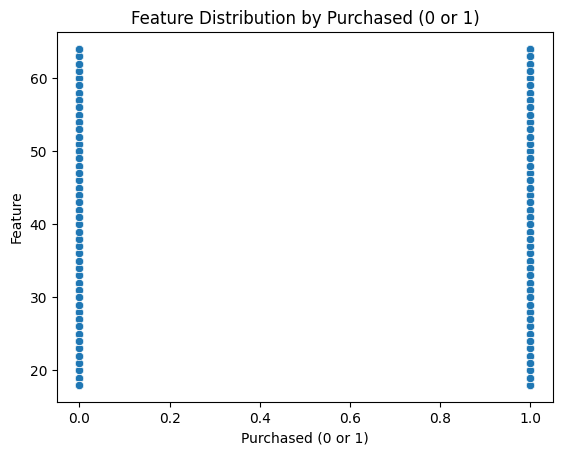

In [36]:
sns.scatterplot(x='Purchased', y='Age', data=df)
plt.title('Feature Distribution by Purchased (0 or 1)')
plt.xlabel('Purchased (0 or 1)')
plt.ylabel('Feature')
plt.show()


In [45]:
df_encoded = pd.get_dummies(df['Gender'],  drop_first=True)

# Convert boolean to 0 and 1
df_encoded = df_encoded.astype(int)

print(df_encoded)


     Male
0       0
1       1
2       0
3       0
4       0
..    ...
995     1
996     1
997     0
998     1
999     0

[1000 rows x 1 columns]


In [47]:
data = pd.concat([df, df_encoded], axis=1)

In [48]:
x = data[['Age', 'Salary', 'Male', 'Price']].to_numpy()

In [49]:
x

array([[   49, 61000,     0,  2000],
       [   36, 30000,     1,  2000],
       [   26, 81000,     0,  3500],
       ...,
       [   41, 20000,     0,  2000],
       [   22, 29000,     1,  5000],
       [   49, 36000,     0,  3500]])

In [50]:
y = data['Purchased'].to_numpy()

In [51]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [54]:
X_train = st.fit_transform(X_train)
X_train = st.transform(X_train)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred = knn.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [60]:
accuracy

0.755

In [61]:
import pickle


In [62]:
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [63]:
with open('scalaer.pkl', 'wb') as file:
    pickle.dump(knn, file)